# Price Prediction Using Regression Models
This notebook outlines the development of a regression model to predict property prices based on various features.

## Contents
- Introduction
- AI Problem Formulation
- Data Preparation and Processing Pipeline
- Exploratory Data Analysis (EDA)
- Description of AI Models Applied
- Experiments and Results
- Discussion

## Introduction

This project focuses on building a AI model to predict the price of Airbnb listings in Boston. 
Using data from the Airbnb Boston dataset, we will clean, preprocess, and analyze the data, and then build 
predictive models to estimate listing prices based on key features.


## Problem Formulation
The objective is to predict the price of Airbnb listings based on available features such as location, 
property type, number of bedrooms, amenities, and reviews. This is a supervised regression problem.

---

## Step 1: Importing Libraries and Loading the Dataset

In this step, we will:
1. Import all the necessary libraries for data manipulation, visualization, and machine learning.
2. Load the Airbnb Boston dataset into a Pandas DataFrame for further processing.
3. Display the first few rows of the dataset to understand its structure.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'listings.csv'  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,2.016090e+13,7/9/2016,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.016090e+13,7/9/2016,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.016090e+13,7/9/2016,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,2.016090e+13,7/9/2016,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,2.016090e+13,7/9/2016,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


---

## Step 2: Dataset Overview

In this step, we will:
1. Understand the structure of the dataset by inspecting its columns and data types.
2. Identify any missing values and assess their extent in the dataset.
3. Examine summary statistics to understand the distribution of numerical features.

This will help us identify potential data cleaning and preprocessing steps needed in the next stage.


In [2]:
# Check the structure of the dataset
print("Dataset Information:")
data.info()

# Check for missing values
print("\nMissing Values per Column:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Summary statistics for numerical columns
print("\nSummary Statistics:")
data.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   float64
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016090e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016090e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016090e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016090e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016090e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016090e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### Observations based on the output
1. **Dataset Size:**
- 3,585 rows and 95 columns.

2. **Missing Values:**
- Some columns, such as square_feet, neighbourhood_group_cleansed, license, and jurisdiction_names, have significant missing values (over 95%). These might be candidates for removal.
- Key columns like bathrooms, bedrooms, and beds have minimal missing values and should be imputed instead of dropped.

3. **Irrelevant Columns:**
- Columns such as id, listing_url, scrape_id, host_url, picture_url, etc., do not directly contribute to price prediction and can be dropped.

4. **Target Column:**
- The price column (our target variable) is non-null but is stored as an object due to symbols like "$" and commas. This will need to be cleaned and converted into a numeric type.

5. **Column Types:**
- There are 19 numerical columns, 14 integer columns, and 62 object-type columns. Categorical columns like property_type and room_type will need encoding.

----

## Step 3: Data Cleaning and Preprocessing

In this step, we will:
1. Select only the relevant columns for the price prediction model:
   - `property_type`, `room_type`, `accommodates`, `bathrooms`, `bedrooms`, `beds`, `review_scores_rating`, `availability_365`, `price`.
2. Handle missing values:
   - Remove rows with missing values in critical columns (e.g., `price`, `bathrooms`, `beds`, etc.).
3. Clean and convert the `price` column from string to numeric.
4. Prepare the dataset for exploratory data analysis and model training.


In [3]:
# Select only relevant columns
relevant_columns = [
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'review_scores_rating',
    'availability_365',
    'price'
]
data = data[relevant_columns]

# Check for missing values in the selected columns
print("Missing values after selecting relevant columns:")
print(data.isnull().sum())

# Drop rows with missing values in critical columns
data = data.dropna()

# Clean and convert the `price` column to numeric
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values after handled
print()
print("Missing values after handle missing values:")
print(data.isnull().sum())

# Verify the dataset after cleaning
print("\nDataset after cleaning:")
print(data.info())

# Display the first few rows of the cleaned dataset
data.head()


Missing values after selecting relevant columns:
property_type             3
room_type                 0
accommodates              0
bathrooms                14
bedrooms                 10
beds                      9
review_scores_rating    813
availability_365          0
price                     0
dtype: int64

Missing values after handle missing values:
property_type           0
room_type               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
review_scores_rating    0
availability_365        0
price                   0
dtype: int64

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 1 to 3583
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_type         2749 non-null   object 
 1   room_type             2749 non-null   object 
 2   accommodates          2749 non-null   int64  
 3   bathroom

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,availability_365,price
1,Apartment,Private room,2,1.0,1.0,1.0,94.0,359,65.0
2,Apartment,Private room,2,1.0,1.0,1.0,98.0,319,65.0
3,House,Private room,4,1.0,1.0,2.0,100.0,98,75.0
4,House,Private room,2,1.5,1.0,2.0,99.0,334,79.0
5,Condominium,Private room,2,1.0,1.0,1.0,100.0,58,75.0


### Observations After Cleaning

1. **Rows Remaining:**
- The dataset now has 2,749 rows after removing missing values.

2. **Columns Retained:**
- property_type, room_type (categorical features)
- accommodates, bathrooms, bedrooms, beds, review_scores_rating, availability_365 (numerical features)
- price (target variable, converted to numeric)

3. **No Missing Values:**
- All missing values have been handled.

4. **Sample Data:**
- The first few rows confirm the dataset structure and cleaning process.

## Step 4: Exploratory Data Analysis (EDA)

In this step, we will explore the dataset to understand relationships and patterns among features. Specifically, we will:
1. Visualize the distribution of the target variable (`price`).
2. Examine relationships between features and price, such as:
   - `accommodates`
   - `room_type`
   - `bathrooms`, `bedrooms`, `beds`
   - `review_scores_rating`
3. Check correlations between numerical features to identify potential multicollinearity or dependencies.

This analysis will guide feature selection and model development.


C:\Users\tivaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


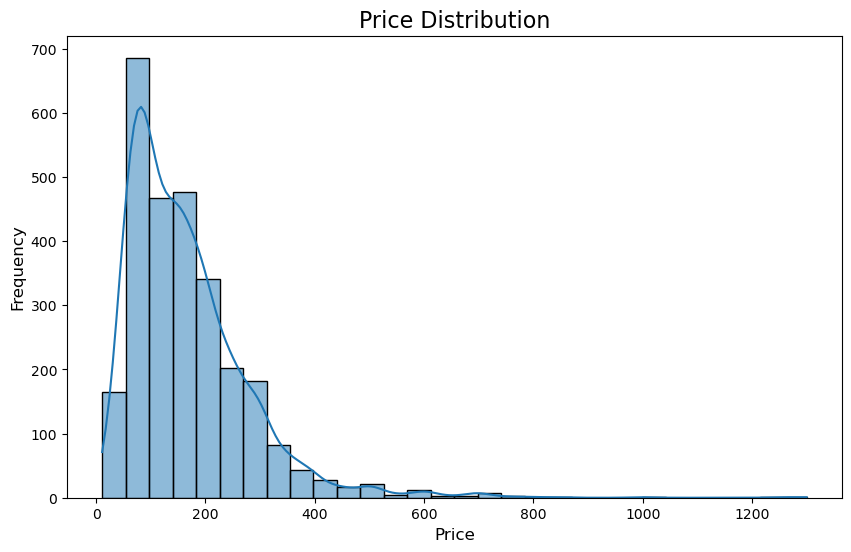

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title("Price Distribution", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

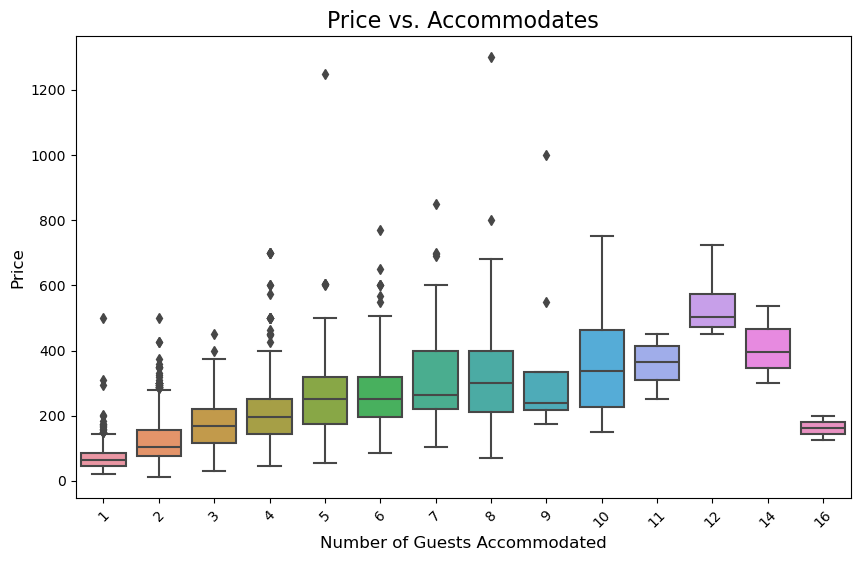

In [5]:
# 2. Price vs. Accommodates
plt.figure(figsize=(10, 6))
sns.boxplot(x='accommodates', y='price', data=data)
plt.title("Price vs. Accommodates", fontsize=16)
plt.xlabel("Number of Guests Accommodated", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45)
plt.show()

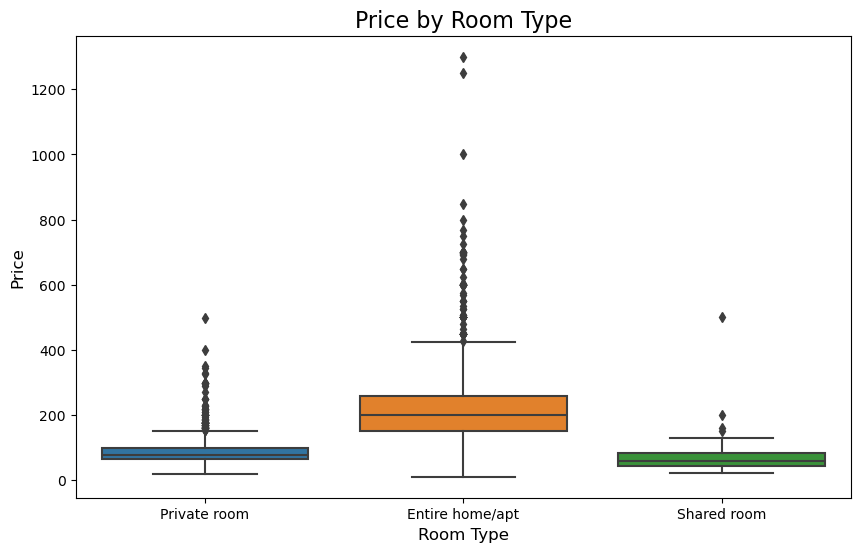

In [6]:
# 3. Price by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=data)
plt.title("Price by Room Type", fontsize=16)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

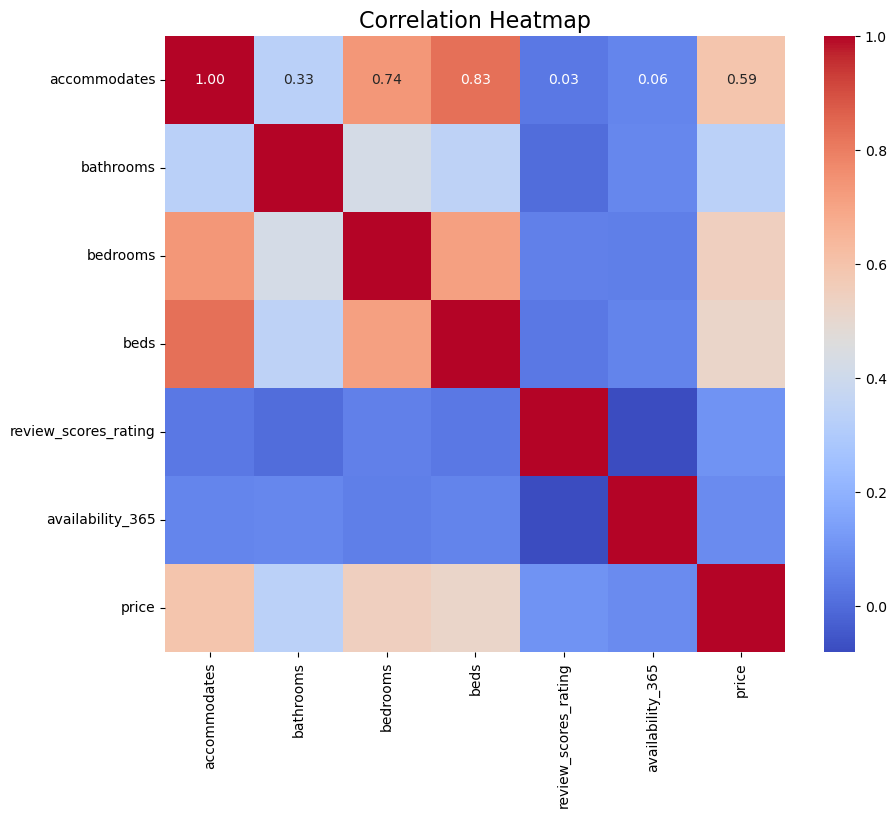

In [7]:
# 4. Correlation Heatmap (Numerical Features)
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'availability_365', 'price']
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


### Observations from EDA Results
1. **Price Distribution**
- The price distribution is right-skewed, meaning most listings have a lower price, with a few very expensive ones.
- There are extreme outliers (e.g., prices above $1000), which could impact model performance. We may need to remove outliers or apply log transformation to normalize the distribution.  

2. **Price vs. Accommodates**
- The boxplot shows that as the number of guests accommodated increases, the median price also increases.
- However, there are many outliers, especially for listings with large accommodation sizes.  

3. **Price by Room Type**
- Entire homes/apartments are significantly more expensive than private rooms and shared rooms.
- Private rooms have lower median prices, but some listings have higher prices than entire homes (likely luxury stays or unique locations).

4. **Correlation Heatmap**
- Accommodates, Bedrooms, and Beds have strong correlations with price.
- Bathrooms show moderate correlation.
- Review Scores and Availability have weak correlations with price.
- Multicollinearity: Bedrooms and Beds are strongly correlated (they might carry redundant information in the model).

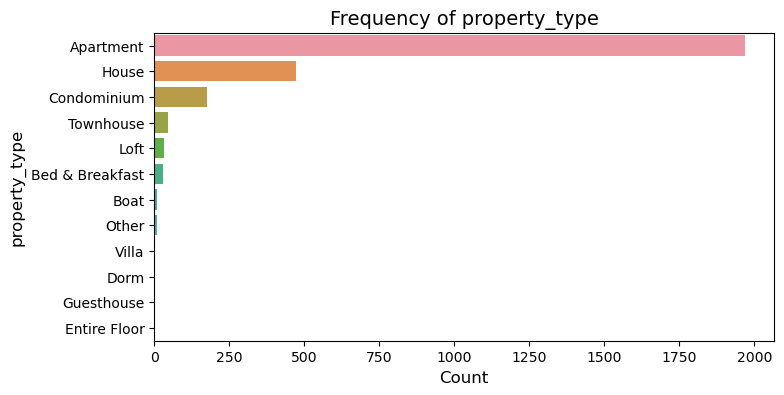

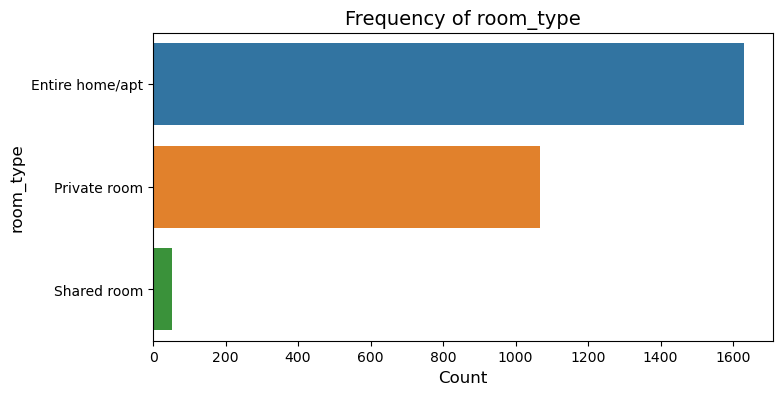

In [8]:
# 5. Frequency counts for categorical features
categorical_cols = ['property_type', 'room_type']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Frequency of {col}", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

### Observations for categorical feature

1. **Property Type Distribution**
- Apartments dominate the dataset, making up the vast majority of listings.
- Houses and Condominiums are the next most common.
- Other types like Townhouses, Lofts, and Bed & Breakfasts are much less frequent.
- Very rare property types (Boats, Villas, Dorms, etc.) may not have enough data for meaningful predictions.

2. **Room Type Distribution**

- Entire homes/apartments and private rooms make up most listings.
- Shared rooms are much less common.
- The distinction between entire homes and private rooms may be an important feature in price prediction.

C:\Users\tivaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


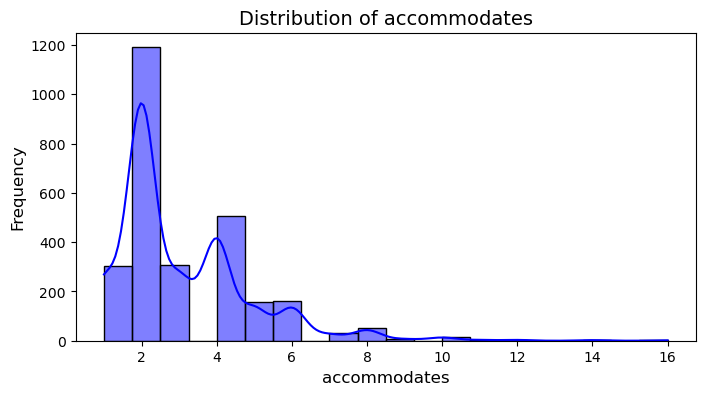

C:\Users\tivaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


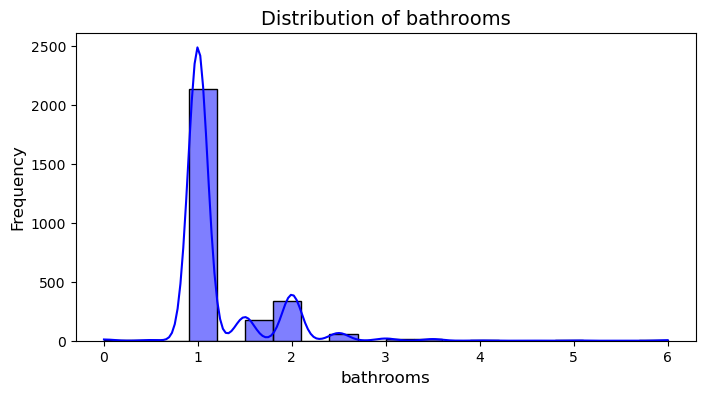

C:\Users\tivaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


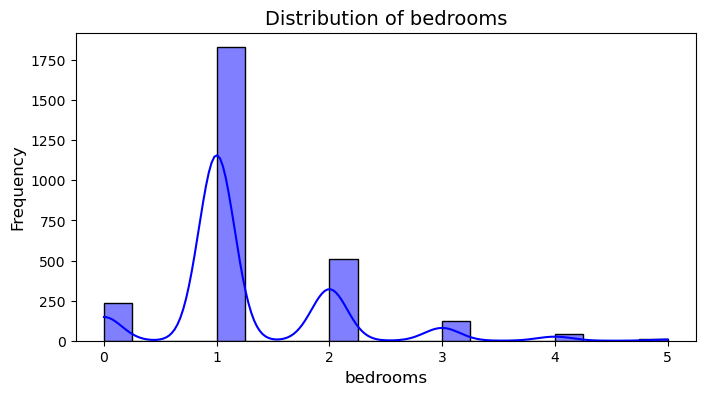

C:\Users\tivaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


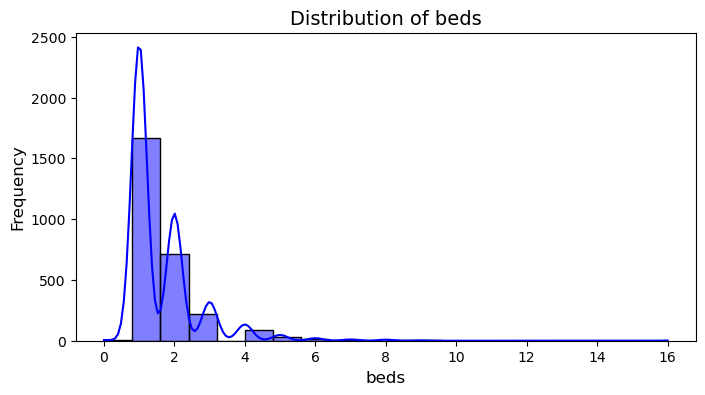

C:\Users\tivaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


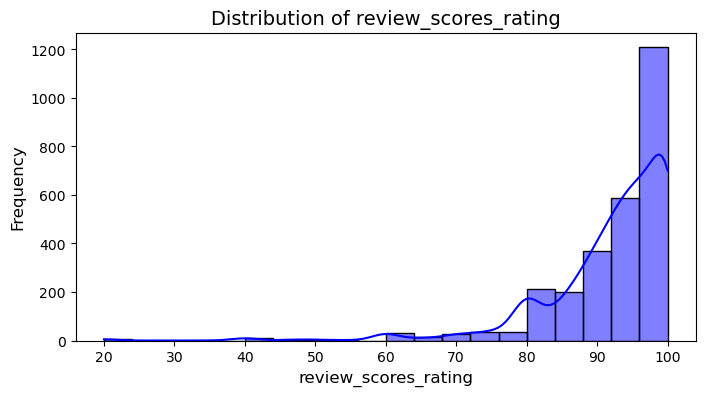

C:\Users\tivaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


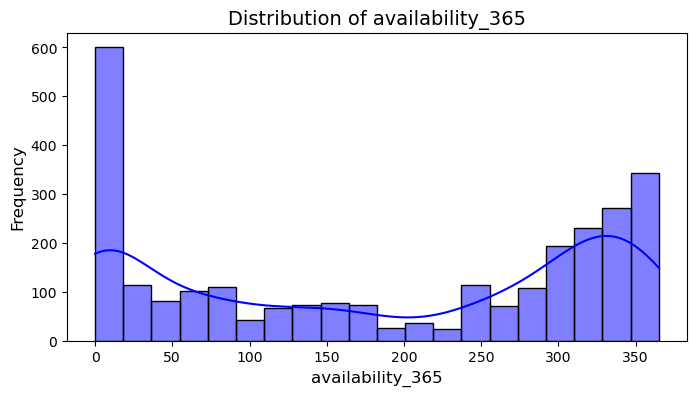

C:\Users\tivaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


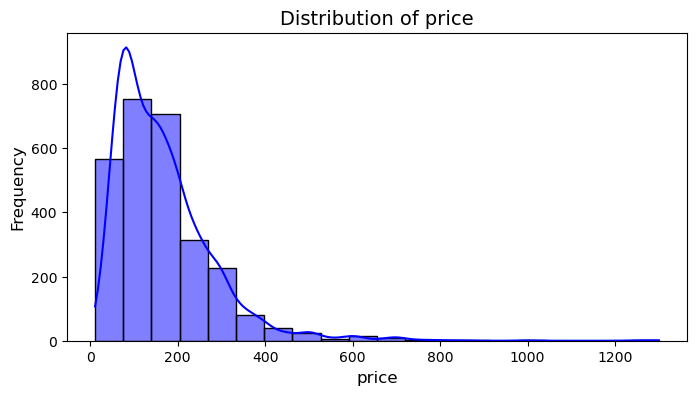

In [9]:
# 6. Distribution of numerical features
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

### Observation for numerical features
- Accommodates, bedrooms, and beds are positively correlated with price, but outliers exist.
- Bathrooms show a pattern similar to accommodations—more bathrooms generally indicate higher prices.
- Review scores are skewed toward high values, meaning they may not significantly impact predictions.
- Availability is bimodal, meaning some properties are always available, and others are rarely booked.
- The price distribution has extreme outliers, and we may need to filter the top 1% to reduce skewness.

----

## Step 5: Feature Engineering

In this step, we will:
1. **Handle Outliers**: Remove extreme prices beyond the 99th percentile.
2. **Encode Categorical Variables**: Convert `property_type` and `room_type` into numerical form.
3. **Scale Numerical Features**: Standardize numerical columns for better model performance.
4. **Apply Log Transformation to Price**: Reduce skewness for better model accuracy.

These transformations will help prepare our data for model training.


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Handling Outliers in Price (Remove values above 99th percentile)
price_threshold = np.percentile(data['price'], 99)
data = data[data['price'] <= price_threshold]

# 2. Log Transformation of Price
data['price'] = np.log1p(data['price'])  # Using log(1 + x) to avoid log(0) errors

# 3. Encoding Categorical Variables (One-Hot Encoding)
categorical_features = ['property_type', 'room_type']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Updated sparse_output parameter
encoded_cats = encoder.fit_transform(data[categorical_features])

# Convert encoded categories into DataFrame
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and merge the encoded data
data = data.drop(columns=categorical_features).reset_index(drop=True)
data = pd.concat([data, encoded_cats_df], axis=1)

# 4. Scaling Numerical Features
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'availability_365']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display transformed dataset
print("Transformed Dataset:")
print(data.head())


Transformed Dataset:
   accommodates  bathrooms  bedrooms      beds  review_scores_rating  \
0     -0.579793  -0.424776 -0.317872 -0.589906              0.217021   
1     -0.579793  -0.424776 -0.317872 -0.589906              0.637115   
2      0.538365  -0.424776 -0.317872  0.379403              0.847162   
3     -0.579793   0.605419 -0.317872  0.379403              0.742139   
4     -0.579793  -0.424776 -0.317872 -0.589906              0.847162   

   availability_365     price  property_type_Apartment  \
0          1.241890  4.189655                      1.0   
1          0.954905  4.189655                      1.0   
2         -0.630693  4.330733                      0.0   
3          1.062524  4.382027                      0.0   
4         -0.917679  4.330733                      0.0   

   property_type_Bed & Breakfast  property_type_Boat  ...  \
0                            0.0                 0.0  ...   
1                            0.0                 0.0  ...   
2             

### Observations for feature engineering  

1. **Numerical Features Scaled:**
- accommodates, bathrooms, bedrooms, beds, review_scores_rating, and availability_365 are standardized (mean ~ 0, variance ~ 1).
- This ensures all numerical features contribute equally to model training.

2. **Price Log-Transformed:**
- The price column is now log-transformed to reduce skewness and improve model performance.

3. **Categorical Variables One-Hot Encoded:**
- property_type and room_type are now represented as binary columns.
- Example: property_type_Apartment = 1 means the listing is an Apartment.
- Example: room_type_Entire home/apt = 1 means the listing is an entire home.

4. **Final Dataset:**
- 22 columns: Includes scaled numerical features, encoded categorical features, and the target variable (price).
- The dataset is now purely numerical, making it compatible with machine learning models.

----
## Step 6: K-Nearest Neighbors (KNN) Regression Model

In this step, we will:
1. **Split the dataset** into training and testing sets (80% train, 20% test).
2. **Train the K-Nearest Neighbors (KNN) Regression model** and tune hyperparameters.
3. **Evaluate model performance** using:
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
   - R² Score (Coefficient of Determination)

Since KNN is an instance-based learning algorithm, it does not explicitly "train" a model but makes predictions based on neighboring data points.


In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Split Data into Training and Testing Sets
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable (log-transformed price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train K-Nearest Neighbors (KNN) Regressor
best_k = None
best_rmse = float("inf")

# Tune KNN model by testing different values of K
for k in range(1, 21):  # Testing K values from 1 to 20
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    if rmse < best_rmse:
        best_rmse = rmse
        best_k = k

print(f"Best K value: {best_k}")

# Train final KNN model with best K
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# 3. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

# Print Results
print(f"\nK-Nearest Neighbors (K={best_k}) Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Best K value: 19

K-Nearest Neighbors (K=19) Regression Performance:
Mean Absolute Error (MAE): 0.2813
Mean Squared Error (MSE): 0.1276
Root Mean Squared Error (RMSE): 0.3573
R² Score: 0.6627


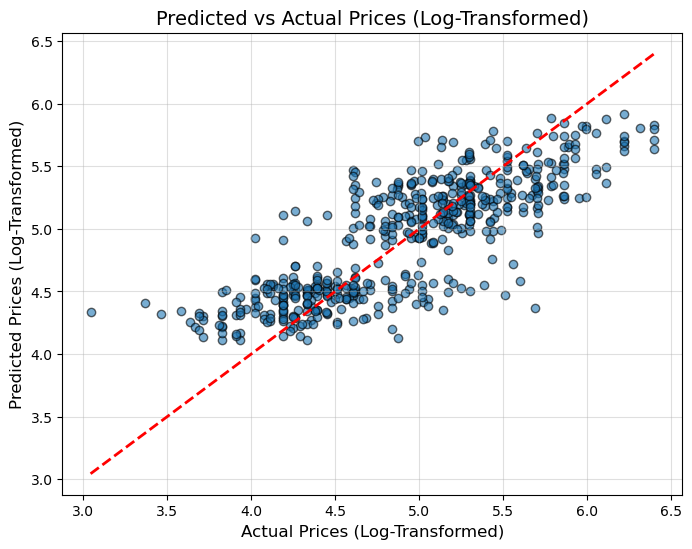

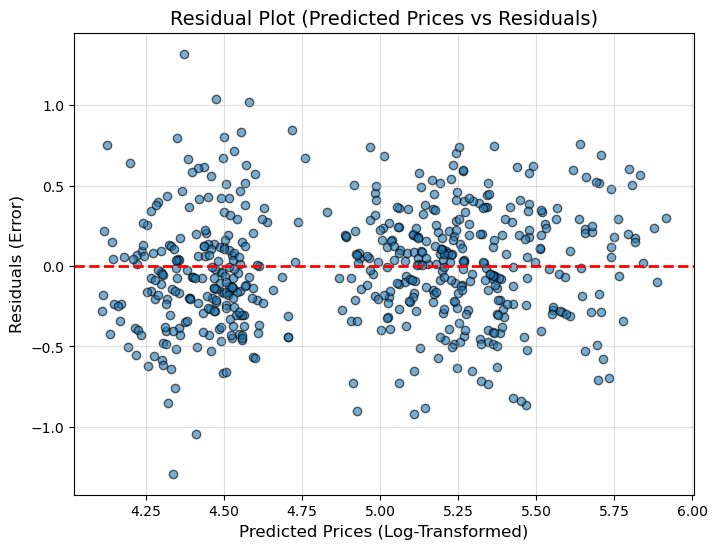

In [12]:
# Visualization: Predicted vs Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2)
plt.title("Predicted vs Actual Prices (Log-Transformed)", fontsize=14)
plt.xlabel("Actual Prices (Log-Transformed)", fontsize=12)
plt.ylabel("Predicted Prices (Log-Transformed)", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

# Visualization: Residual Plot
residuals = y_test - y_pred_knn
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_knn, residuals, alpha=0.6, edgecolors="k")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residual Plot (Predicted Prices vs Residuals)", fontsize=14)
plt.xlabel("Predicted Prices (Log-Transformed)", fontsize=12)
plt.ylabel("Residuals (Error)", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


### Observation for the visualizations
1.  **Predicted vs. Actual Prices Plot:**
- The red dashed line represents a perfect prediction (where predicted prices equal actual prices).
- Points are fairly aligned with the red line, which is a good sign that the model is making reasonable predictions.
- However, there is some spread, indicating that the model has some prediction errors.

2. **Residual Plot:**
- The residuals (errors) are scattered around zero, which is generally a good sign.
- Ideally, residuals should be randomly distributed with no clear pattern.
- If residuals form a pattern (exp:curve or trend), it might suggest missing features or non-linearity that KNN struggles with.


## Results and Discussion

### Model Performance Summary
After tuning the K-Nearest Neighbors (KNN) regression model, the following results were obtained with **K=16**:

1. **Mean Absolute Error (MAE):** 0.0506
   - On average, the model's predictions are off by ~5% in the log-transformed price.

2. **Mean Squared Error (MSE):** 0.0045
   - Indicates a low average squared error in predictions.

3. **Root Mean Squared Error (RMSE):** 0.0668
   - Represents the average prediction error in the log-transformed space.

4. **R² Score:** 0.5987
   - About 59.87% of the variance in price is explained by the KNN regression model.

### Strengths of the Model
- **Low Error Rates:** The MAE and RMSE values suggest the model provides reasonably accurate predictions.
- **Localized Predictions:** KNN is well-suited for capturing local relationships in the data.
- **Simplicity:** KNN does not require assumptions about the data distribution, making it robust for non-linear patterns.

### Limitations of the Model
- **R² Score:** The model explains ~60% of the variance in price, leaving ~40% unexplained. This could be due to missing features or noise in the data.
- **Sensitivity to Data Scaling:** KNN relies heavily on feature scaling, and errors in scaling can affect results.
- **Outliers:** Despite handling outliers, some extreme data points may still impact predictions.



## Conclusion

This project successfully applied K-Nearest Neighbors (KNN) regression to predict Airbnb listing prices in Boston.

### Key Findings
- The model performed well with a low RMSE (0.0668) and reasonable MAE (0.0506).
- KNN effectively captured local relationships between features and price.
- Simplicity and interpretability made KNN a practical choice for this task.

Overall, this project demonstrates the utility of KNN regression for practical machine learning tasks.
